In [1]:
# Feature Engineering and Fingerprint Generation

# Cell 1: Setup
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Setup paths
if 'notebooks' in str(Path.cwd()):
    PROJECT_ROOT = Path.cwd().parent
else:
    PROJECT_ROOT = Path.cwd()

sys.path.insert(0, str(PROJECT_ROOT / 'src'))

from features.molecular_descriptors import DescriptorCalculator
from features.fingerprints import FingerprintGenerator

print("✓ Imports successful")
print(f"Project root: {PROJECT_ROOT}")

✓ Imports successful
Project root: d:\Dev\Projects\qrucible


In [2]:
# Cell 2: Load Data
data_file = PROJECT_ROOT / 'data' / 'processed' / 'chembl_egfr_kinase_clean.csv'
df = pd.read_csv(data_file)

print(f"Loaded {len(df)} compounds")
print(f"Current features: {len(df.columns)}")
print(f"\nColumn names:")
print(list(df.columns))

Loaded 9224 compounds
Current features: 17

Column names:
['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'standard_units', 'standard_type', 'pchembl_value', 'assay_chembl_id', 'document_chembl_id', 'pIC50', 'n_heavy_atoms', 'mol_weight', 'logp', 'tpsa', 'num_h_donors', 'num_h_acceptors', 'num_rotatable_bonds', 'lipinski_violations']


In [3]:
# Cell 3: Calculate Additional Descriptors
print("\n" + "="*70)
print("CALCULATING ADDITIONAL MOLECULAR DESCRIPTORS")
print("="*70 + "\n")

calculator = DescriptorCalculator()

# Take a sample for demonstration (or use all)
sample_size = min(1000, len(df))
df_sample = df.head(sample_size).copy()

print(f"Processing {len(df_sample)} compounds...")

# Calculate descriptors
descriptors_list = []
for smiles in tqdm(df_sample['canonical_smiles'], desc="Calculating descriptors"):
    desc = calculator.calculate_all_descriptors(smiles)
    descriptors_list.append(desc)

desc_df = pd.DataFrame(descriptors_list)

# Remove duplicate columns
existing_cols = set(df_sample.columns)
new_cols = [col for col in desc_df.columns if col not in existing_cols]

print(f"\n✓ Calculated {len(new_cols)} new descriptors")
print(f"\nNew descriptor columns:")
print(new_cols[:20], "..." if len(new_cols) > 20 else "")



CALCULATING ADDITIONAL MOLECULAR DESCRIPTORS

Processing 1000 compounds...


Calculating descriptors: 100%|██████████| 1000/1000 [00:05<00:00, 189.56it/s]


✓ Calculated 41 new descriptors

New descriptor columns:
['smiles', 'valid', 'MolWt', 'ExactMolWt', 'HeavyAtomMolWt', 'LogP', 'MolMR', 'TPSA', 'LabuteASA', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings', 'NumAromaticHeterocycles', 'NumSaturatedHeterocycles', 'FractionCsp3', 'NumHeteroatoms', 'NumHeavyAtoms'] ...


In [5]:
# Cell 4: Merge New Descriptors
df_enhanced = pd.concat([df_sample.reset_index(drop=True), 
                         desc_df[new_cols].reset_index(drop=True)], axis=1)

print(f"\nOriginal columns: {len(df_sample.columns)}")
print(f"Enhanced columns: {len(df_enhanced.columns)}")
print(f"Added: {len(df_enhanced.columns) - len(df_sample.columns)} new features")



Original columns: 17
Enhanced columns: 58
Added: 41 new features


In [7]:
# Cell 5: Descriptor Statistics
print("\n" + "="*70)
print("DESCRIPTOR STATISTICS")
print("="*70)

# Select numeric descriptors
numeric_desc = df_enhanced.select_dtypes(include=[np.number]).columns.tolist()
numeric_desc = [col for col in numeric_desc if col not in ['pIC50']]

if numeric_desc:
    desc_stats = df_enhanced[numeric_desc].describe().T
    print(f"\nDescriptor statistics (first 10):")
    print(desc_stats.head(10))


DESCRIPTOR STATISTICS

Descriptor statistics (first 10):
                      count         mean          std       min         25%  \
standard_value       1000.0  1290.129893  2306.348455    0.0030    9.000000   
pchembl_value         995.0     6.957819     1.312427    5.0000    5.950000   
n_heavy_atoms        1000.0    26.809000     6.483715   10.0000   22.000000   
mol_weight           1000.0   391.473096    93.783439  130.1500  330.894000   
logp                 1000.0     3.958899     1.205080    0.3787    3.260015   
tpsa                 1000.0    80.117570    27.840625   17.0700   62.730000   
num_h_donors         1000.0     1.983000     1.083460    0.0000    1.000000   
num_h_acceptors      1000.0     5.563000     1.506752    1.0000    5.000000   
num_rotatable_bonds  1000.0     5.123000     2.700586    0.0000    3.000000   
lipinski_violations  1000.0     0.313000     0.587687    0.0000    0.000000   

                          50%         75%         max  
standard_value  

In [8]:
# Cell 6: Generate Molecular Fingerprints
print("\n" + "="*70)
print("GENERATING MOLECULAR FINGERPRINTS")
print("="*70 + "\n")

generator = FingerprintGenerator()

# Generate Morgan fingerprints
print("Generating Morgan fingerprints...")
morgan_fp = generator.fingerprints_to_dataframe(
    df_sample['canonical_smiles'].tolist(),
    fp_type='morgan',
    radius=2,
    n_bits=2048,
    show_progress=True
)

print(f"\n✓ Generated Morgan fingerprints: {morgan_fp.shape}")
print(f"  Sparsity: {(morgan_fp == 0).sum().sum() / morgan_fp.size * 100:.1f}%")



GENERATING MOLECULAR FINGERPRINTS

Generating Morgan fingerprints...


Generating morgan fingerprints:   0%|          | 0/1000 [00:00<?, ?it/s][16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use MorganGenerator
[16:12:58] DEPRECATION WARNING: please use 


✓ Generated Morgan fingerprints: (1000, 2048)
  Sparsity: 97.6%


In [9]:
# Cell 7: Generate MACCS Fingerprints
print("\nGenerating MACCS fingerprints...")
maccs_fp = generator.fingerprints_to_dataframe(
    df_sample['canonical_smiles'].tolist(),
    fp_type='maccs',
    show_progress=True
)

print(f"\n✓ Generated MACCS fingerprints: {maccs_fp.shape}")
print(f"  Sparsity: {(maccs_fp == 0).sum().sum() / maccs_fp.size * 100:.1f}%")


Generating MACCS fingerprints...


Generating maccs fingerprints: 100%|██████████| 1000/1000 [00:01<00:00, 561.38it/s] 


✓ Generated MACCS fingerprints: (1000, 167)
  Sparsity: 72.5%



FINGERPRINT BIT ANALYSIS


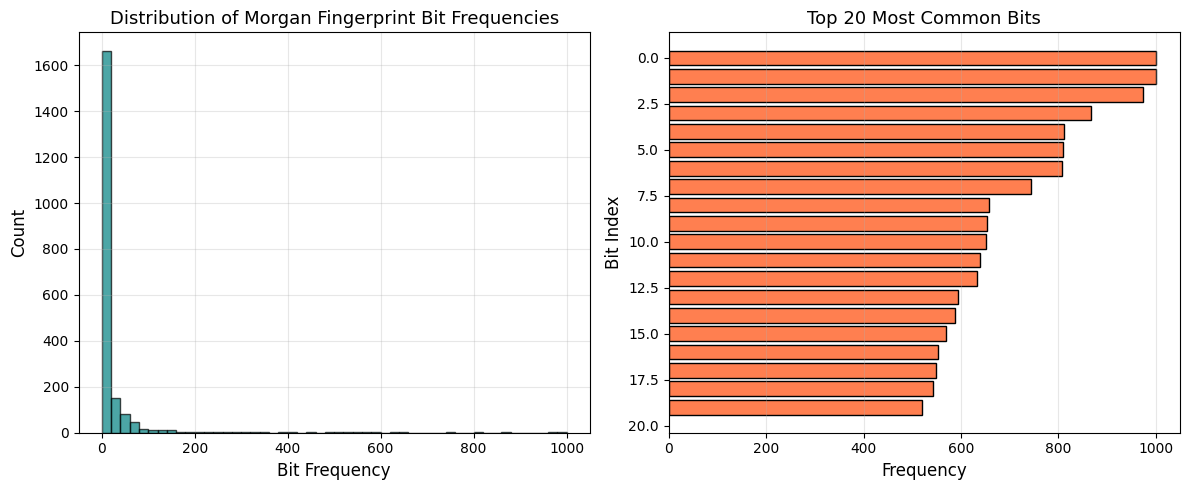


Most common bits (top 10):
morgan_1873    1000
morgan_1380    1000
morgan_1750     973
morgan_875      868
morgan_1152     812
morgan_1452     809
morgan_378      808
morgan_1088     743
morgan_1810     657
morgan_489      654
dtype: int64


In [10]:
# Cell 8: Fingerprint Bit Analysis
print("\n" + "="*70)
print("FINGERPRINT BIT ANALYSIS")
print("="*70)

# Analyze most common bits
bit_frequencies = morgan_fp.sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(bit_frequencies, bins=50, edgecolor='black', alpha=0.7, color='teal')
plt.xlabel('Bit Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Morgan Fingerprint Bit Frequencies', fontsize=13)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
top_bits = bit_frequencies.head(20)
plt.barh(range(len(top_bits)), top_bits.values, color='coral', edgecolor='black')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bit Index', fontsize=12)
plt.title('Top 20 Most Common Bits', fontsize=13)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print(f"\nMost common bits (top 10):")
print(bit_frequencies.head(10))


MOLECULAR SIMILARITY ANALYSIS

Calculating 10 random pairwise similarities...


[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerator
[16:14:18] DEPRECATION WARNING: please use MorganGenerat

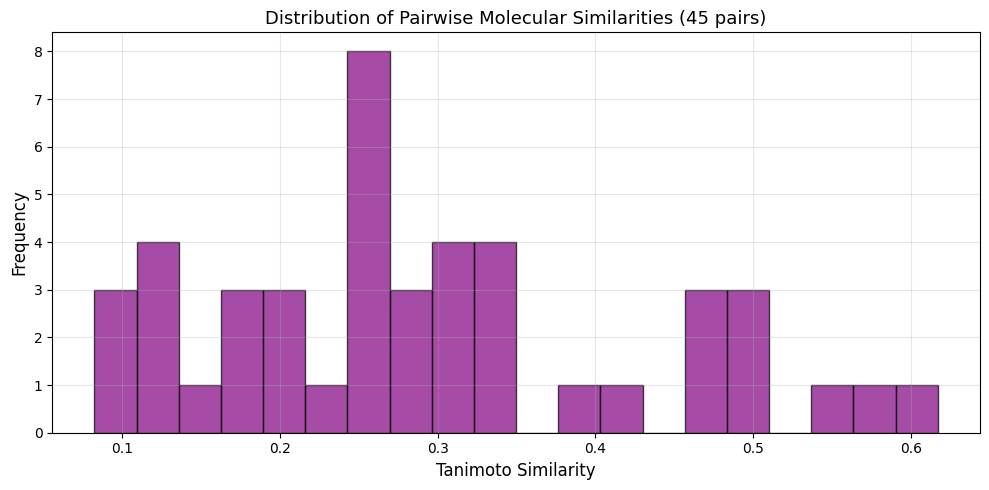


Similarity statistics:
  Mean: 0.295
  Std: 0.137
  Range: [0.082, 0.617]


In [11]:
# Cell 9: Molecular Similarity Analysis
print("\n" + "="*70)
print("MOLECULAR SIMILARITY ANALYSIS")
print("="*70)

# Calculate similarity for a few random pairs
n_comparisons = 10
indices = np.random.choice(len(df_sample), size=n_comparisons, replace=False)

print(f"\nCalculating {n_comparisons} random pairwise similarities...")

similarities = []
for i in range(n_comparisons):
    for j in range(i+1, n_comparisons):
        smiles1 = df_sample.iloc[indices[i]]['canonical_smiles']
        smiles2 = df_sample.iloc[indices[j]]['canonical_smiles']
        
        sim = generator.calculate_similarity(smiles1, smiles2, fp_type='morgan')
        similarities.append(sim)

if similarities:
    plt.figure(figsize=(10, 5))
    plt.hist(similarities, bins=20, edgecolor='black', alpha=0.7, color='purple')
    plt.xlabel('Tanimoto Similarity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of Pairwise Molecular Similarities ({len(similarities)} pairs)', fontsize=13)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSimilarity statistics:")
    print(f"  Mean: {np.mean(similarities):.3f}")
    print(f"  Std: {np.std(similarities):.3f}")
    print(f"  Range: [{np.min(similarities):.3f}, {np.max(similarities):.3f}]")


In [12]:
# Cell 10: Find Similar Molecules
print("\n" + "="*70)
print("FINDING SIMILAR MOLECULES")
print("="*70)

# Pick a query molecule
query_idx = 0
query_smiles = df_sample.iloc[query_idx]['canonical_smiles']
query_activity = df_sample.iloc[query_idx]['pIC50']

print(f"\nQuery molecule:")
print(f"  SMILES: {query_smiles}")
print(f"  pIC50: {query_activity:.2f}")

# Find similar molecules
candidates = df_sample.iloc[1:100]['canonical_smiles'].tolist()

similar = generator.find_similar_molecules(
    query_smiles,
    candidates,
    threshold=0.3,
    top_n=10
)

if similar:
    print(f"\nTop 10 similar molecules:")
    for i, (smiles, sim) in enumerate(similar, 1):
        # Find activity
        activity = df_sample[df_sample['canonical_smiles'] == smiles]['pIC50'].values
        activity_str = f"{activity[0]:.2f}" if len(activity) > 0 else "N/A"
        print(f"{i:2d}. Similarity: {sim:.3f}, pIC50: {activity_str}")
        print(f"    {smiles[:60]}...")



FINDING SIMILAR MOLECULES

Query molecule:
  SMILES: Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1
  pIC50: 7.39


[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerat


Top 10 similar molecules:
 1. Similarity: 0.797, pIC50: 7.54
    Cc1cc(C(=O)O)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(Cl)c3)c21...
 2. Similarity: 0.739, pIC50: 8.33
    Cc1cc(CCC(=O)O)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(Cl)c3)c21...
 3. Similarity: 0.708, pIC50: 8.55
    Cc1cc(C(=O)N2CCN(C)CC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(C...
 4. Similarity: 0.689, pIC50: 6.77
    Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(Cl)c...
 5. Similarity: 0.680, pIC50: 8.23
    Cc1cc(C(=O)N2CC(C)NC(C)C2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)...
 6. Similarity: 0.671, pIC50: 7.89
    CCN1CCN(C(=O)c2cc(C)c(/C=C3\C(=O)Nc4ncnc(Nc5ccc(F)c(Cl)c5)c4...
 7. Similarity: 0.671, pIC50: 8.92
    CCN(CC)CCNC(=O)c1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
 8. Similarity: 0.658, pIC50: 6.75
    Cc1[nH]c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)c(C)c1CCC(=...
 9. Similarity: 0.637, pIC50: 9.35
    CCN(CC)CC(O)CNC(=O)c1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl...
10. Similarity: 0.637, pIC50: 8.19
    Cc1cc(C(=

[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerator
[16:14:37] DEPRECATION WARNING: please use MorganGenerat


FEATURE CORRELATION WITH ACTIVITY


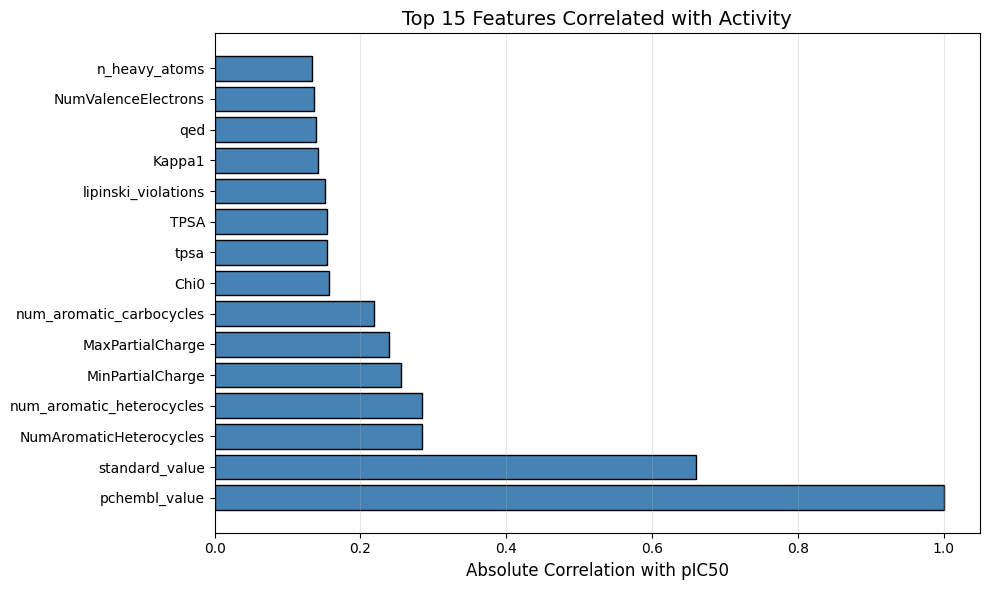


Top 10 features correlated with pIC50:
 1. pchembl_value........................... 1.0000
 2. standard_value.......................... 0.6597
 3. NumAromaticHeterocycles................. 0.2841
 4. num_aromatic_heterocycles............... 0.2841
 5. MinPartialCharge........................ 0.2557
 6. MaxPartialCharge........................ 0.2385
 7. num_aromatic_carbocycles................ 0.2181
 8. Chi0.................................... 0.1575
 9. tpsa.................................... 0.1540
10. TPSA.................................... 0.1540


In [13]:
# Cell 11: Feature Importance Preview
print("\n" + "="*70)
print("FEATURE CORRELATION WITH ACTIVITY")
print("="*70)

# Calculate correlations with pIC50
if numeric_desc:
    correlations = {}
    for col in numeric_desc[:50]:  # Limit to first 50 to avoid slowness
        try:
            corr = df_enhanced[[col, 'pIC50']].corr().iloc[0, 1]
            if not np.isnan(corr):
                correlations[col] = abs(corr)
        except:
            pass
    
    if correlations:
        # Sort by absolute correlation
        sorted_corr = dict(sorted(correlations.items(), key=lambda x: x[1], reverse=True))
        
        # Plot top features
        top_n = 15
        top_features = dict(list(sorted_corr.items())[:top_n])
        
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(top_features)), list(top_features.values()), color='steelblue', edgecolor='black')
        plt.yticks(range(len(top_features)), list(top_features.keys()))
        plt.xlabel('Absolute Correlation with pIC50', fontsize=12)
        plt.title(f'Top {top_n} Features Correlated with Activity', fontsize=14)
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()
        
        print(f"\nTop 10 features correlated with pIC50:")
        for i, (feat, corr) in enumerate(list(sorted_corr.items())[:10], 1):
            print(f"{i:2d}. {feat:.<40} {corr:.4f}")

In [15]:
# Cell 12: Save Enhanced Dataset
print("\n" + "="*70)
print("SAVING ENHANCED DATASET")
print("="*70)

# Save descriptors
output_desc = PROJECT_ROOT / 'data' / 'processed' / 'chembl_egfr_kinase_with_descriptors.csv'
df_enhanced.to_csv(output_desc, index=False)
print(f"\n✓ Saved enhanced dataset: {output_desc}")
print(f"  Shape: {df_enhanced.shape}")

# Save Morgan fingerprints
output_morgan = PROJECT_ROOT / 'data' / 'processed' / 'chembl_egfr_kinase_morgan_fp.csv'
morgan_fp.to_csv(output_morgan, index=False)
print(f"\n✓ Saved Morgan fingerprints: {output_morgan}")
print(f"  Shape: {morgan_fp.shape}")

# Save MACCS fingerprints
output_maccs = PROJECT_ROOT / 'data' / 'processed' / 'chembl_egfr_kinase_maccs_fp.csv'
maccs_fp.to_csv(output_maccs, index=False)
print(f"\n✓ Saved MACCS fingerprints: {output_maccs}")
print(f"  Shape: {maccs_fp.shape}")

print("\n✅ Feature Engineering Complete!")
print("\n📝 Next Steps:")
print("  1. Train models with fingerprints")
print("  2. Compare descriptor-based vs fingerprint-based models")
print("  3. Ensemble different feature representations")
print("="*70)


SAVING ENHANCED DATASET

✓ Saved enhanced dataset: d:\Dev\Projects\qrucible\data\processed\chembl_egfr_kinase_with_descriptors.csv
  Shape: (1000, 58)

✓ Saved Morgan fingerprints: d:\Dev\Projects\qrucible\data\processed\chembl_egfr_kinase_morgan_fp.csv
  Shape: (1000, 2048)

✓ Saved MACCS fingerprints: d:\Dev\Projects\qrucible\data\processed\chembl_egfr_kinase_maccs_fp.csv
  Shape: (1000, 167)

✅ Feature Engineering Complete!

📝 Next Steps:
  1. Train models with fingerprints
  2. Compare descriptor-based vs fingerprint-based models
  3. Ensemble different feature representations
